# House Rent Prediction 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
house_rent = pd.read_csv("D:\\data science uni\\kaggle\\House_Rent_Dataset.csv")

In [3]:
house_rent.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18-05-2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13-05-2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16-05-2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04-07-2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09-05-2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
house_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
house_rent.shape

(4746, 12)

In [6]:
house_rent.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

**Calculate Missing values in dataset

In [7]:
house_rent.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64



**There is no null value for any column in the dataset.




**Statistical Description of Columns


In [8]:
house_rent.describe().T


,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0


size of the dataset

In [9]:
len(house_rent)

4746

In [10]:
house_rent.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,18-05-2022,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,15-05-2022,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,10-07-2022,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,06-07-2022,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,04-05-2022,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [11]:
Floor=house_rent.Floor
Floor

0       Ground out of 2
1            1 out of 3
2            1 out of 3
3            1 out of 2
4            1 out of 2
             ...       
4741         3 out of 5
4742         1 out of 4
4743         3 out of 5
4744       23 out of 34
4745         4 out of 5
Name: Floor, Length: 4746, dtype: object

In [12]:
house_rent.rename(columns={'Posted On': 'date','Tenant Preferred':'Tenant_preferred','Furnishing Status':'Furnishing','Size':'size(sqrt.ft)'},inplace=True)

In [13]:
house_rent['date'] = pd.to_datetime(house_rent.date)

# categorical variables
# ###house_rent['Tenant_preferred'] = house_rent['Tenant_preferred'].astype('category')
# ###house_rent['Furnishing'] = house_rent['Furnishing'].astype('category')

In [14]:
house_rent['month'] = house_rent['date'].dt.month.astype('category')


In [15]:
# Let's compute the price sqft.
house_rent['price_per_sqft'] = np.round(house_rent['Rent'] / house_rent['size(sqrt.ft)']) 
house_rent['price_per_sqft'] = np.round(house_rent['Rent'] / house_rent['size(sqrt.ft)'])

In [16]:
class SomeAnalysis:

    def __init__(self, data):
            self.data = data

    def analysis(self):
            column_list = self.data.columns.to_list()
            print("Name of columns::", column_list)
            print()
            columns_with_missing_data = self.data.columns[self.data.isnull().any()].tolist()
            print("Columns with Missing Data::", columns_with_missing_data)
            print()

            number_of_duplicates = self.data.duplicated().sum()
            print("Number of duplicates::", number_of_duplicates)
            print()

In [17]:
obj = SomeAnalysis(house_rent)
obj.analysis()

Name of columns:: ['date', 'BHK', 'Rent', 'size(sqrt.ft)', 'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing', 'Tenant_preferred', 'Bathroom', 'Point of Contact', 'month', 'price_per_sqft']

Columns with Missing Data:: []

Number of duplicates:: 0



In [18]:
house_rent.head()

,date,BHK,Rent,size(sqrt.ft),Floor,Area Type,Area Locality,City,Furnishing,Tenant_preferred,Bathroom,Point of Contact,month,price_per_sqft
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,9.0
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,25.0
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,17.0
3,2022-04-07,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,4,12.0
4,2022-09-05,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,9,9.0


In [19]:
house_rent.Floor.unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [20]:
new= house_rent["Floor"].str.split(" ", expand = True)
new

,0,1,2,3,4
0,Ground,out,of,2,None
1,1,out,of,3,None
2,1,out,of,3,None
3,1,out,of,2,None
4,1,out,of,2,None
...,...,...,...,...,...
4741,3,out,of,5,None
4742,1,out,of,4,None
4743,3,out,of,5,None
4744,23,out,of,34,None


In [21]:
house_rent["Floor"]= new[0]
house_rent

,date,BHK,Rent,size(sqrt.ft),Floor,Area Type,Area Locality,City,Furnishing,Tenant_preferred,Bathroom,Point of Contact,month,price_per_sqft
0,2022-05-18,2,10000,1100,Ground,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,9.0
1,2022-05-13,2,20000,800,1,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,25.0
2,2022-05-16,2,17000,1000,1,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,17.0
3,2022-04-07,2,10000,800,1,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,4,12.0
4,2022-09-05,2,7500,850,1,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,5,15.0
4742,2022-05-15,3,29000,2000,1,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,5,14.0
4743,2022-10-07,3,35000,1750,3,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,10,20.0
4744,2022-06-07,3,45000,1500,23,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,6,30.0


In [22]:
house_rent.Floor.unique()

array(['Ground', '1', '2', '4', '3', '5', '7', '8', 'Upper', '11',
       'Lower', '6', '14', '43', '13', '18', '17', '9', '19', '60', '34',
       '12', '26', '25', '53', '16', '10', '39', '32', '47', '28', '20',
       '15', '65', '40', '37', '22', '21', '30', '35', '33', '44', '41',
       '46', '27', '45', '48', '50', '24', '23', '29', '49', '36', '76'],
      dtype=object)

In [23]:
house_rent=house_rent.replace(to_replace="Ground",value="0")
house_rent=house_rent.replace(to_replace=["Upper","Lower"],value="1")


In [24]:
house_rent

,date,BHK,Rent,size(sqrt.ft),Floor,Area Type,Area Locality,City,Furnishing,Tenant_preferred,Bathroom,Point of Contact,month,price_per_sqft
0,2022-05-18,2,10000,1100,0,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,9.0
1,2022-05-13,2,20000,800,1,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,25.0
2,2022-05-16,2,17000,1000,1,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,17.0
3,2022-04-07,2,10000,800,1,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,4,12.0
4,2022-09-05,2,7500,850,1,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,5,15.0
4742,2022-05-15,3,29000,2000,1,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,5,14.0
4743,2022-10-07,3,35000,1750,3,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,10,20.0
4744,2022-06-07,3,45000,1500,23,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,6,30.0


In [25]:
house_rent.isnull().sum()

date                0
BHK                 0
Rent                0
size(sqrt.ft)       0
Floor               0
Area Type           0
Area Locality       0
City                0
Furnishing          0
Tenant_preferred    0
Bathroom            0
Point of Contact    0
month               0
price_per_sqft      0
dtype: int64

In [26]:
house_rent['Floor'] = house_rent['Floor'].astype('int')


In [27]:
house_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              4746 non-null   datetime64[ns]
 1   BHK               4746 non-null   int64         
 2   Rent              4746 non-null   int64         
 3   size(sqrt.ft)     4746 non-null   int64         
 4   Floor             4746 non-null   int32         
 5   Area Type         4746 non-null   object        
 6   Area Locality     4746 non-null   object        
 7   City              4746 non-null   object        
 8   Furnishing        4746 non-null   object        
 9   Tenant_preferred  4746 non-null   object        
 10  Bathroom          4746 non-null   int64         
 11  Point of Contact  4746 non-null   object        
 12  month             4746 non-null   category      
 13  price_per_sqft    4746 non-null   float64       
dtypes: category(1), datetime

In [28]:
house_rent['date']=house_rent['date'].dt.strftime('%d-%m-%Y')

In [29]:
house_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   date              4746 non-null   object  
 1   BHK               4746 non-null   int64   
 2   Rent              4746 non-null   int64   
 3   size(sqrt.ft)     4746 non-null   int64   
 4   Floor             4746 non-null   int32   
 5   Area Type         4746 non-null   object  
 6   Area Locality     4746 non-null   object  
 7   City              4746 non-null   object  
 8   Furnishing        4746 non-null   object  
 9   Tenant_preferred  4746 non-null   object  
 10  Bathroom          4746 non-null   int64   
 11  Point of Contact  4746 non-null   object  
 12  month             4746 non-null   category
 13  price_per_sqft    4746 non-null   float64 
dtypes: category(1), float64(1), int32(1), int64(4), object(7)
memory usage: 468.6+ KB


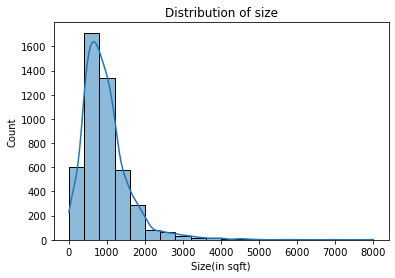

In [30]:
sns.histplot(data=house_rent[['size(sqrt.ft)']],x='size(sqrt.ft)', bins=20, kde='True')
plt.title("Distribution of size")
plt.xlabel("Size(in sqft)")
plt.show()

Distribustion of size is right skewed

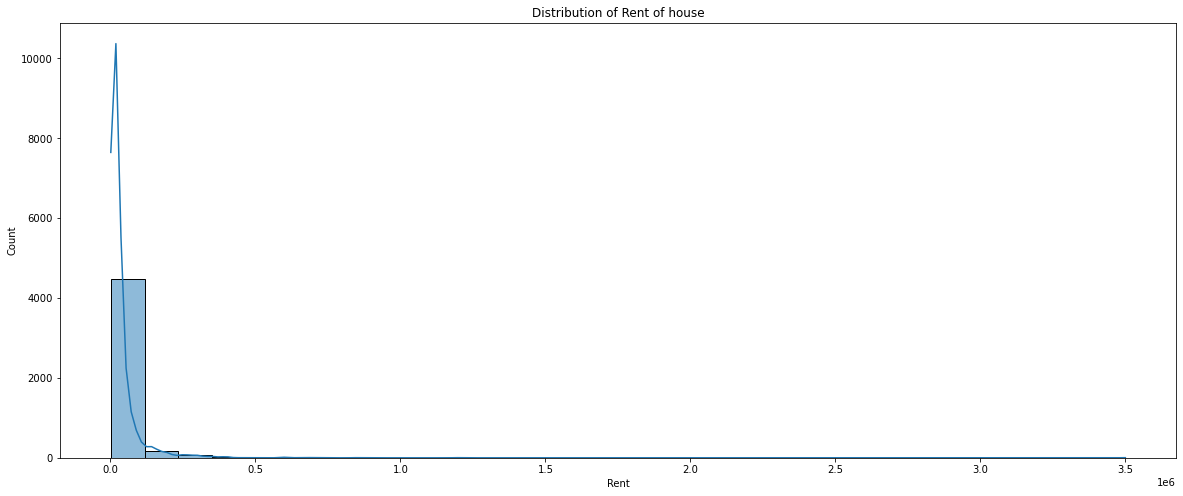

In [31]:
# Distribution of RENT.
plt.figure(figsize=(20,8))
sns.histplot(data=house_rent[['Rent']], x='Rent', bins=30, kde='True')
plt.title("Distribution of Rent of house")
plt.xlabel("Rent")
plt.show()

** the distribution of Rent house is right skewed that is house rent is high.

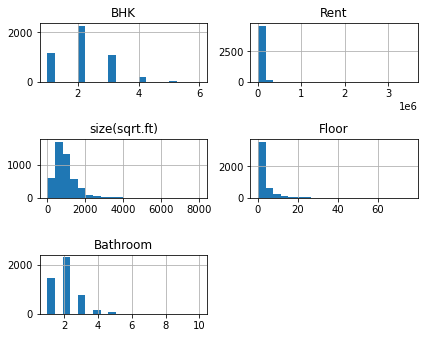

In [32]:
# Distribution of all numeric columns.
numeric_columns = house_rent.select_dtypes(include='int').columns.tolist()
house_rent[numeric_columns].hist(xlabelsize=10,bins=20)
plt.tight_layout(rect=(1, 0, 2, 1.2))


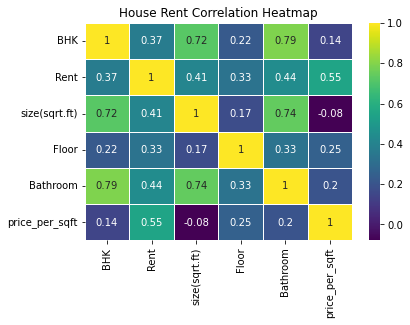

In [33]:
corr = house_rent.corr()
sns.heatmap(round(corr, 2), annot=True, linewidth=0.5,cmap='viridis')
plt.title("House Rent Correlation Heatmap")
plt.show()


size(sqrt.ft) and bathroom have high correlation among all.

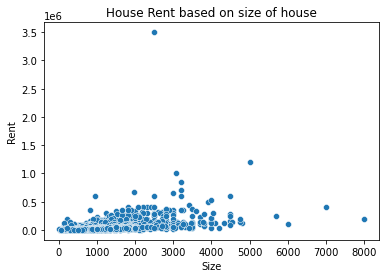

In [34]:
# Visualizing the price of house based on size.
sns.scatterplot(x='size(sqrt.ft)', y='Rent',
             data=house_rent)

plt.xlabel("Size")
plt.ylabel("Rent")
plt.title("House Rent based on size of house")
plt.show()

<AxesSubplot:xlabel='City', ylabel='Rent'>

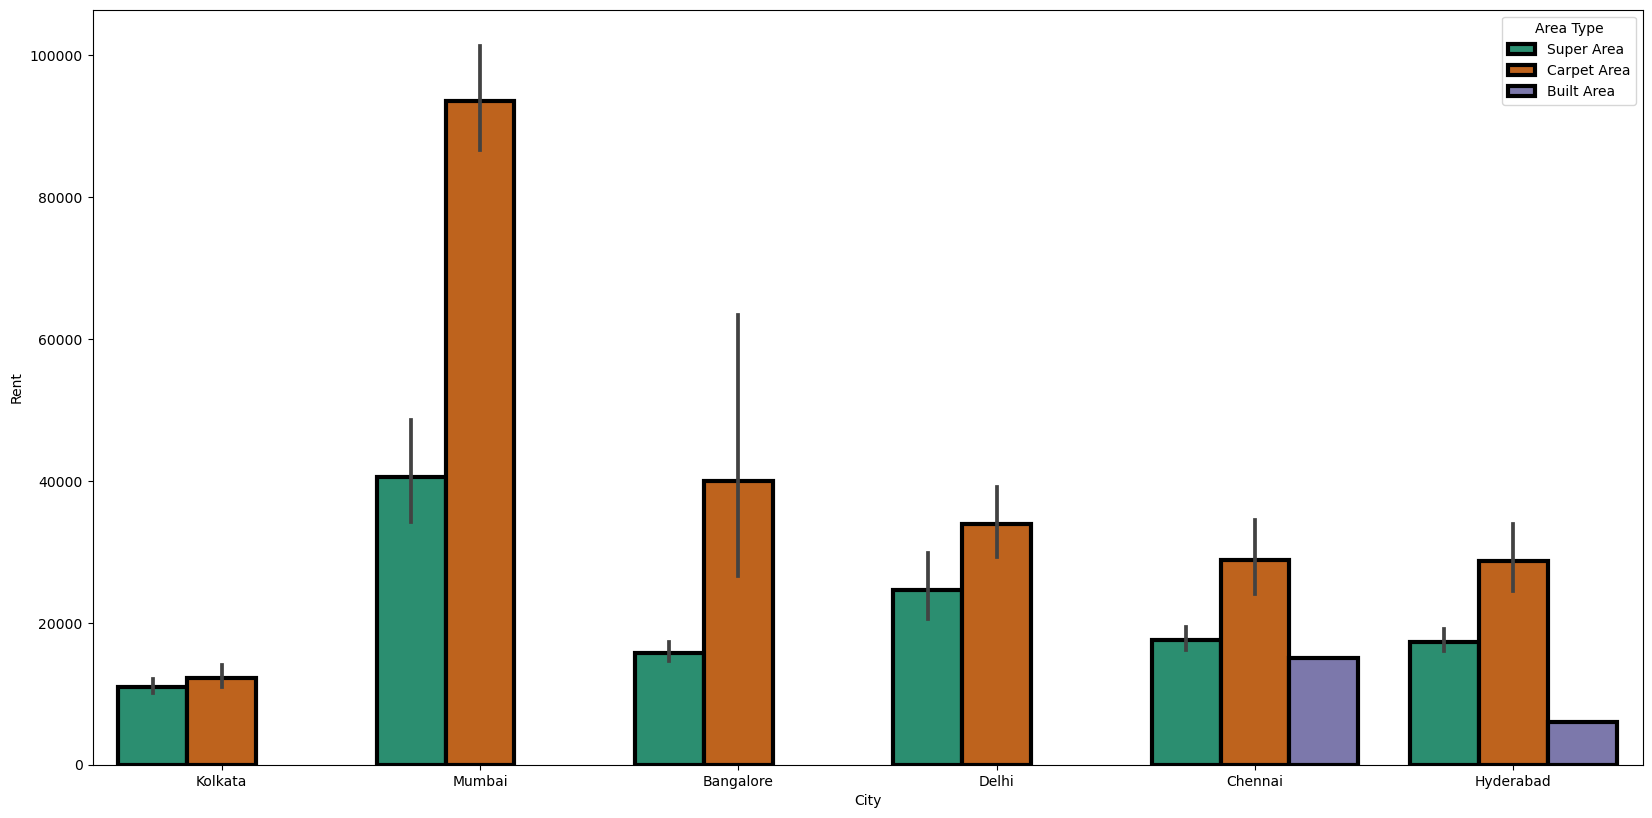

In [35]:
plt.figure(figsize=(20,10),dpi=100)

sns.barplot(data= house_rent,y='Rent',x='City',hue='Area Type', palette ='Dark2',edgecolor='black',linewidth=3)

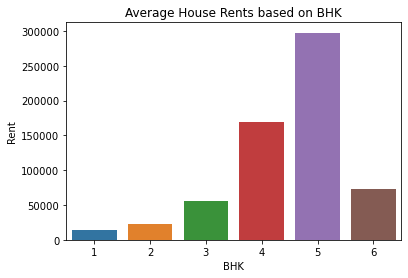

In [36]:
# Let's visualize the Rent of houses is affected by BHK .( Data prepration.)

Rent_BHk = house_rent.groupby(by=['BHK'])['Rent'].apply(np.mean).reset_index()

sns.barplot(data=Rent_BHk, x='BHK', y='Rent')

plt.title("Average House Rents based on BHK")
plt.xlabel("BHK")
plt.ylabel("Rent")
plt.show()

Rent of 5 BHK is high

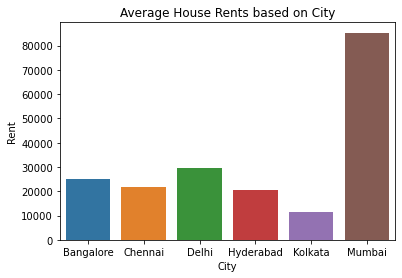

In [37]:
# Let's visualize the Rent of houses is affected by City .( Data prepration.)

Rent_City = house_rent.groupby(by=['City'])['Rent'].apply(np.mean).reset_index()

sns.barplot(data=Rent_City , x='City', y='Rent')

plt.title("Average House Rents based on City")
plt.xlabel('City')
plt.ylabel("Rent")
plt.show()

In Mumbai there is high rent Houses

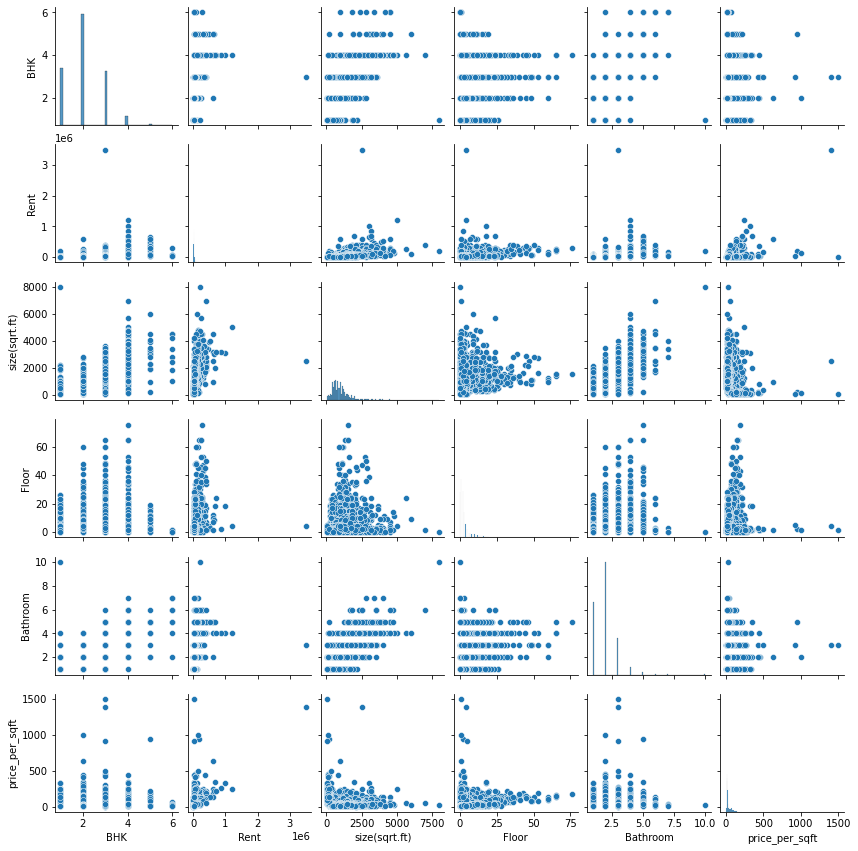

In [38]:
# plt.figure(figsize=(10,8),dpi=150)
# sns.pairplot(data=house_rent,hue='BHK',diag_kind='hist',corner=True)

sns.pairplot(house_rent, height=2)

In [39]:
# Let's find the number of houses with highest rents.
house_rent.loc[house_rent.Rent == house_rent.Rent.max()]

,date,BHK,Rent,size(sqrt.ft),Floor,Area Type,Area Locality,City,Furnishing,Tenant_preferred,Bathroom,Point of Contact,month,price_per_sqft
1837,06-08-2022,3,3500000,2500,4,Carpet Area,Marathahalli,Bangalore,Semi-Furnished,Bachelors,3,Contact Agent,8,1400.0


In [40]:
# There is only single house with rent 3500000. Therefore remove it.
house_rent = house_rent.loc[house_rent.Rent != house_rent.Rent.max()]

In [41]:
house_rent[house_rent['Rent']>100000]

,date,BHK,Rent,size(sqrt.ft),Floor,Area Type,Area Locality,City,Furnishing,Tenant_preferred,Bathroom,Point of Contact,month,price_per_sqft
104,16-06-2022,2,180000,950,0,Carpet Area,"Avenue S, Santoshpur",Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,6,189.0
530,20-06-2022,2,160000,800,14,Carpet Area,parivar safalya chs,Mumbai,Unfurnished,Bachelors/Family,2,Contact Owner,6,200.0
531,07-07-2022,4,300000,1600,43,Carpet Area,"Trump Tower, Worli",Mumbai,Semi-Furnished,Bachelors/Family,5,Contact Agent,7,188.0
533,07-07-2022,4,130000,1650,13,Carpet Area,"Ajmera Bhakti Park, Bhakti Park",Mumbai,Semi-Furnished,Bachelors/Family,4,Contact Agent,7,79.0
542,21-06-2022,3,270000,1800,3,Carpet Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,4,Contact Agent,6,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4425,07-10-2022,4,120000,3455,12,Super Area,Madhapur,Hyderabad,Semi-Furnished,Family,4,Contact Agent,10,35.0
4457,07-06-2022,4,400000,7000,1,Carpet Area,Jubilee Hills,Hyderabad,Semi-Furnished,Bachelors/Family,6,Contact Agent,6,57.0
4543,06-11-2022,4,200000,4761,1,Carpet Area,K P H B Phase 4,Hyderabad,Semi-Furnished,Bachelors,6,Contact Owner,11,42.0
4669,07-06-2022,4,140000,3789,9,Carpet Area,"Gachibowli CUC, Outer Ring Road",Hyderabad,Semi-Furnished,Family,5,Contact Agent,6,37.0


In [42]:
house_rent.corr()

,BHK,Rent,size(sqrt.ft),Floor,Bathroom,price_per_sqft
BHK,1.000000,0.469925,0.716117,0.224119,0.794830,0.140296
Rent,0.469925,1.000000,0.511398,0.427224,0.562577,0.469470
size(sqrt.ft),0.716117,0.511398,1.000000,0.170833,0.740670,-0.095636
Floor,0.224119,0.427224,0.170833,1.000000,0.331504,0.269451
Bathroom,0.794830,0.562577,0.740670,0.331504,1.000000,0.201323
price_per_sqft,0.140296,0.469470,-0.095636,0.269451,0.201323,1.000000


In [43]:
house_rent['Rent'].value_counts()

15000      275
10000      248
12000      238
20000      175
8000       162
          ... 
94000        1
9400         1
500000       1
1200000      1
5800         1
Name: Rent, Length: 242, dtype: int64

In [44]:
house_rent['Floor'].value_counts()

1     1195
2      945
0      927
3      512
4      271
5      164
6       93
7       74
10      67
8       66
9       65
12      47
11      43
15      41
14      34
18      26
17      22
16      21
19      16
13      15
20      12
25      12
23       9
24       6
21       6
30       5
34       4
28       4
35       3
27       3
22       3
32       3
26       3
65       3
60       3
45       2
36       2
48       2
40       2
53       2
44       1
41       1
46       1
37       1
33       1
50       1
39       1
43       1
29       1
49       1
47       1
76       1
Name: Floor, dtype: int64

In [45]:
house_rent['BHK'].value_counts()

2    2265
1    1167
3    1097
4     189
5      19
6       8
Name: BHK, dtype: int64

In [46]:
house_rent.nlargest(4,'Rent')

,date,BHK,Rent,size(sqrt.ft),Floor,Area Type,Area Locality,City,Furnishing,Tenant_preferred,Bathroom,Point of Contact,month,price_per_sqft
1001,06-01-2022,4,1200000,5000,4,Carpet Area,Juhu,Mumbai,Semi-Furnished,Bachelors/Family,4,Contact Agent,1,240.0
827,18-05-2022,4,1000000,3064,18,Carpet Area,"Raheja Artesia, Worli",Mumbai,Semi-Furnished,Family,4,Contact Agent,5,326.0
1329,23-06-2022,4,850000,3200,2,Carpet Area,Breach Candy,Mumbai,Furnished,Bachelors/Family,4,Contact Agent,6,266.0
1459,27-06-2022,4,700000,3200,24,Carpet Area,"Lady Ratan Tower, Worli",Mumbai,Furnished,Bachelors/Family,4,Contact Agent,6,219.0


In [47]:
house_rent.groupby(['BHK','Rent']).mean()


size(sqrt.ft)  Floor  Bathroom  price_per_sqft
BHK Rent                                                  
1   1500           200.00    0.0       1.0           8.000
    1800           500.00    0.0       1.0           4.000
    2200           700.00    1.0       1.0           3.000
    3000           261.25    0.5       1.0          16.875
    3200           220.00    3.0       1.0          15.000
...                   ...    ...       ...             ...
6   30000         4200.00    0.0       5.0           7.000
    35000         3400.00    0.0       7.0          10.000
    60000         2300.00    0.5       6.5          27.000
    80000         4500.00    1.0       6.0          18.000
    280000        4500.00    0.0       5.0          62.000

[487 rows x 4 columns]

In [48]:
house_rent.agg(['mean','std'])

,BHK,Rent,size(sqrt.ft),Floor,Bathroom,price_per_sqft
mean,2.083667,34263.207587,967.167756,3.452687,1.965648,38.972813
std,0.832237,59753.925612,633.878701,5.764008,0.884497,56.508908


In [49]:
house_rent["Rent"].sort_values(ascending = False)[:5]

1001    1200000
827     1000000
1329     850000
1459     700000
1484     680000
Name: Rent, dtype: int64

In [50]:
print(np.where(house_rent['Rent']>2000000))

(array([], dtype=int64),)


In [51]:
# Checking outlier
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [52]:
# Replace Size variable with thresholds
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
replace_with_thresholds(house_rent,'Rent')
replace_with_thresholds(house_rent,'size(sqrt.ft)')

In [53]:
house_rent.drop(['Area Locality'], axis=1, inplace=True)

In [54]:
house_rent.head()

,date,BHK,Rent,size(sqrt.ft),Floor,Area Type,City,Furnishing,Tenant_preferred,Bathroom,Point of Contact,month,price_per_sqft
0,18-05-2022,2,10000,1100,0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,9.0
1,13-05-2022,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,25.0
2,16-05-2022,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,17.0
3,07-04-2022,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,4,12.0
4,05-09-2022,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,9,9.0


In [55]:
house_rent.shape

(4745, 13)

In [56]:
house_rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4745 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   date              4745 non-null   object  
 1   BHK               4745 non-null   int64   
 2   Rent              4745 non-null   int64   
 3   size(sqrt.ft)     4745 non-null   int64   
 4   Floor             4745 non-null   int32   
 5   Area Type         4745 non-null   object  
 6   City              4745 non-null   object  
 7   Furnishing        4745 non-null   object  
 8   Tenant_preferred  4745 non-null   object  
 9   Bathroom          4745 non-null   int64   
 10  Point of Contact  4745 non-null   object  
 11  month             4745 non-null   category
 12  price_per_sqft    4745 non-null   float64 
dtypes: category(1), float64(1), int32(1), int64(4), object(6)
memory usage: 468.4+ KB


In [57]:
house_rent.drop(['date'], axis = 1, inplace=True)

In [58]:
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()
L=['Area Type','City','Furnishing','Tenant_preferred','Point of Contact','month']
for i in L:
    house_rent[i]= label_encoder.fit_transform(house_rent[i])
house_rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4745 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BHK               4745 non-null   int64  
 1   Rent              4745 non-null   int64  
 2   size(sqrt.ft)     4745 non-null   int64  
 3   Floor             4745 non-null   int32  
 4   Area Type         4745 non-null   int32  
 5   City              4745 non-null   int32  
 6   Furnishing        4745 non-null   int32  
 7   Tenant_preferred  4745 non-null   int32  
 8   Bathroom          4745 non-null   int64  
 9   Point of Contact  4745 non-null   int32  
 10  month             4745 non-null   int64  
 11  price_per_sqft    4745 non-null   float64
dtypes: float64(1), int32(6), int64(5)
memory usage: 370.7 KB


In [59]:
house_rent.shape

(4745, 12)

In [60]:
X = house_rent.drop(['Rent'],axis=1)
y = house_rent['Rent']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (3796, 11)
x test:  (949, 11)
y train:  (3796,)
y test:  (949,)


In [62]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [63]:
r2 = r2_score(y_true=y_train,y_pred=y_pred)
r2
print('R squared: {}'.format(r2))

R squared: 0.7717273840765395


In [64]:
adj_r2 = 1-((1-r2)*(200-1)/(200-3-1))
adj_r2

0.7682334154654662

In [65]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print('Mean of Residuals {}'.format(mean_residuals))  

Mean of Residuals -4.906862879955103e-12


#mean is almost zero our asumption satisfy
residuals satisfy mean 0 and standaed sigma square

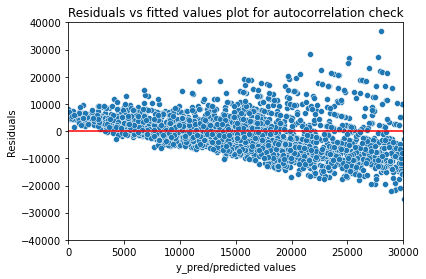

In [66]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-40000,40000)
plt.xlim(0,30000)
p = sns.lineplot([0,30000],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

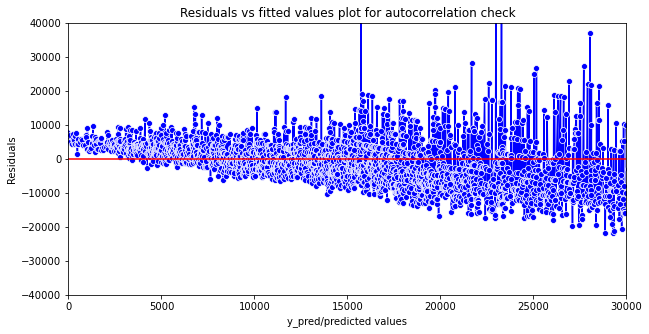

In [67]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-40000,40000)
plt.xlim(0,30000)
p = sns.lineplot([0,30000],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

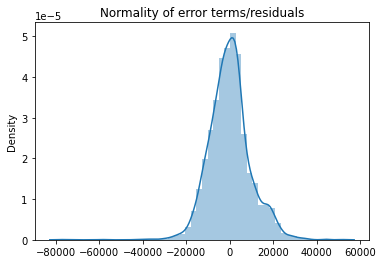

In [68]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

In [69]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [70]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

Train R2-score : 0.77
Test R2-score : 0.66
Train CV scores : [0.7654828  0.77734235 0.76250078 0.76696467 0.75173796]
Train CV mean : 0.76


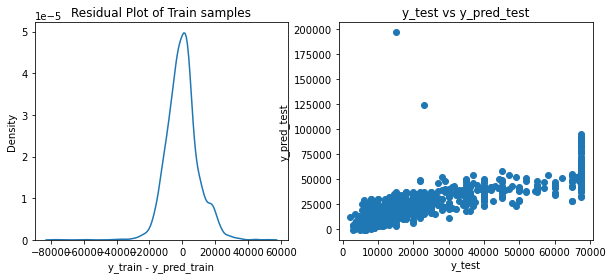

In [71]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
car_pred_model(lr,'Linear_Regressor,pkl')

Train R2-score : 0.77
Test R2-score : 0.66
Train CV scores : [0.7654828  0.77734236 0.76250078 0.76696466 0.7517332 ]
Train CV mean : 0.76


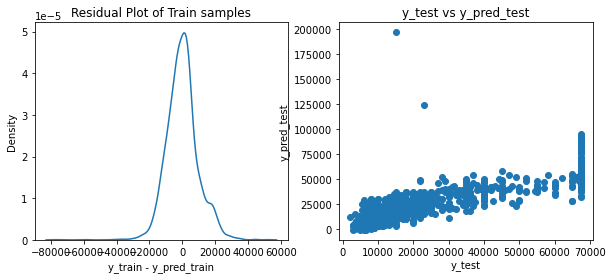

In [72]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

#now create object of ridge model
rg = Ridge()
#now range of alpha
alpha = np.logspace(-4,4,num=10)

# Creating RandomizeCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))
car_pred_model(rg_rs,'ridge.pkl')

# Decision Tree Regressor

In [73]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train,y_train)
y_train_pred = dt_regressor.predict(X_train)
y_test_pred = dt_regressor.predict(X_test)
dt_regressor.score(X_test,y_test)

0.979829820950577

# Random Forest Regressor 

In [74]:
Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(X_train,y_train)
Rf_train_pred = Rf.predict(X_train)
Rf_test_pred = Rf.predict(X_test)


r2_score(y_test,Rf_test_pred)

0.994962946239335

# KNN

In [75]:
from sklearn.neighbors import KNeighborsRegressor
neighbors = range(1, 30, 2)

training_scores = []
test_scores = []
for n_neighbors in neighbors:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [76]:
knn = KNeighborsRegressor(n_neighbors=7)
score = cross_val_score(knn, X_train, y_train, cv=10)
print(f"best cross-validation score: {np.max(score):.3}")

knn.fit(X_train, y_train)
print(f"test-set score: {knn.score(X_test, y_test):.3f}")

best cross-validation score: 0.98
test-set score: 0.979
